In [0]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense,Dropout,SimpleRNN,LSTM,Conv1D,MaxPooling1D,GlobalMaxPooling1D,GRU
from keras.optimizers import RMSprop
from keras import backend as K

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
!git clone https://github.com/iamdsc/humor_detection.git

Cloning into 'humor_detection'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


In [0]:
%cd humor_detection/datasets
!ls

/content/humor_detection/datasets
humorous_oneliners.pickle      proverbs.pickle		 wiki_sentences.pickle
oneliners_incl_doubles.pickle  reuters_headlines.pickle


In [0]:
humour = pd.read_pickle('humorous_oneliners.pickle')
proverb = pd.read_pickle('proverbs.pickle')
wiki = pd.read_pickle('wiki_sentences.pickle')
long_humour = pd.read_pickle('oneliners_incl_doubles.pickle')
reuters = pd.read_pickle('reuters_headlines.pickle')

texts = []
labels = []

# shuffling the different negative samples
neg = proverb+wiki+reuters
np.random.shuffle(neg)

# adding the positive samples
print('No. of positive samples',len(humour))
for line in humour:
  texts.append(line)
  labels.append(1)
  
# taking equal samples from both classes
neg = neg[:len(humour)]

# adding the negative samples
print('No. of negative samples',len(neg))
for line in neg:
  texts.append(line)
  labels.append(0)
  
print('Total no. of samples',len(texts))

No. of positive samples 5251
No. of negative samples 5251
Total no. of samples 10502


In [0]:
maxlen = 50 # cut off sentences after 50 words
max_words = 10000 # only consider top 10000 common words in dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens'%len(word_index))

# padding the sequences
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.array(labels)

print('Shape of data tensor:',data.shape)
print('Shape of labels tensor:',labels.shape)

# shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Found 16911 unique tokens
Shape of data tensor: (10502, 50)
Shape of labels tensor: (10502,)


In [0]:
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 9451 samples, validate on 1051 samples
Epoch 1/20





9451/9451 [==============================] - 18s 2ms/step - loss: 0.6821 - acc: 0.6675 - val_loss: 0.6600 - val_acc: 0.7564
Epoch 2/20
9451/9451 [==============================] - 16s 2ms/step - loss: 0.6178 - acc: 0.7704 - val_loss: 0.5643 - val_acc: 0.8135
Epoch 3/20
9451/9451 [==============================] - 16s 2ms/step - loss: 0.5058 - acc: 0.8189 - val_loss: 0.4170 - val_acc: 0.8735
Epoch 4/20
9451/9451 [==============================] - 16s 2ms/step - loss: 0.3716 - acc: 0.8723 - val_loss: 0.2899 - val_acc: 0.9039
Epoch 5/20
9451/9451 [==============================] - 16s 2ms/step - loss: 0.2801 - acc: 0.9003 - val_loss: 0.2299 - val_acc: 0.9229
Epoch 6/20
9451/9451 [==============================] - 16s 2ms/step - loss: 0.2384 - acc: 0.9103 - val_loss: 0.2023 - val_acc: 0.9343
Epoch 7/20
9451/9451 [================

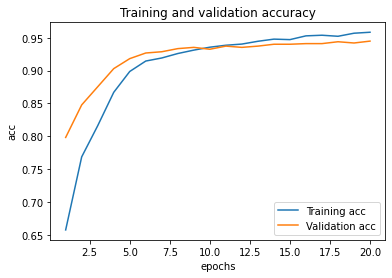

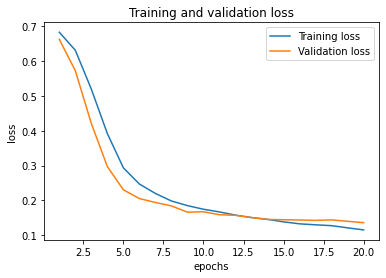

<Figure size 432x288 with 0 Axes>

In [0]:
def plot_result(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  
  epochs = range(1, len(acc)+1)

  plt.plot(epochs, acc, label='Training acc')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('acc')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.figure()

  """plt.plot(epochs, f1, label='Training fmeasure')
  plt.plot(epochs, val_f1, label='Validation fmeasure')
  plt.title('Training and validation fmeasure')
  #plt.xlabel('epochs')
  #plt.ylabel('f1')
  plt.legend()"""
  
  plt.show()
plot_result(history)